In [15]:
# current date, for retrieving data from proper location.
year = "2023"
month = "October"
day = "23"

## Imports and initialization

In [28]:
from matplotlib import gridspec
import scipy.signal
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle
from matplotlib.ticker import ScalarFormatter
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
color2 = 'tab:blue'
color1 = 'tab:green'
markersize = 10
capsize = 5
mpl.rcParams['font.size'] = 14
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [21]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
# import Analysis_Python_Files.UnitConversion as uc
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
import Analysis_Python_Files.CollisionalAnalysis as lac

# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules();

In [18]:
atomlocs = [2, 2, 3, 3, 1]

In [19]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

### File 6 (3x1_Atom_Loading_And_Imaging):  

Number of Pictures: 800; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 10:51:39: on (Y-M-D) 2023-10-26, And ended at 10:54:5: on 2023-10-26
Experiment Notes:  



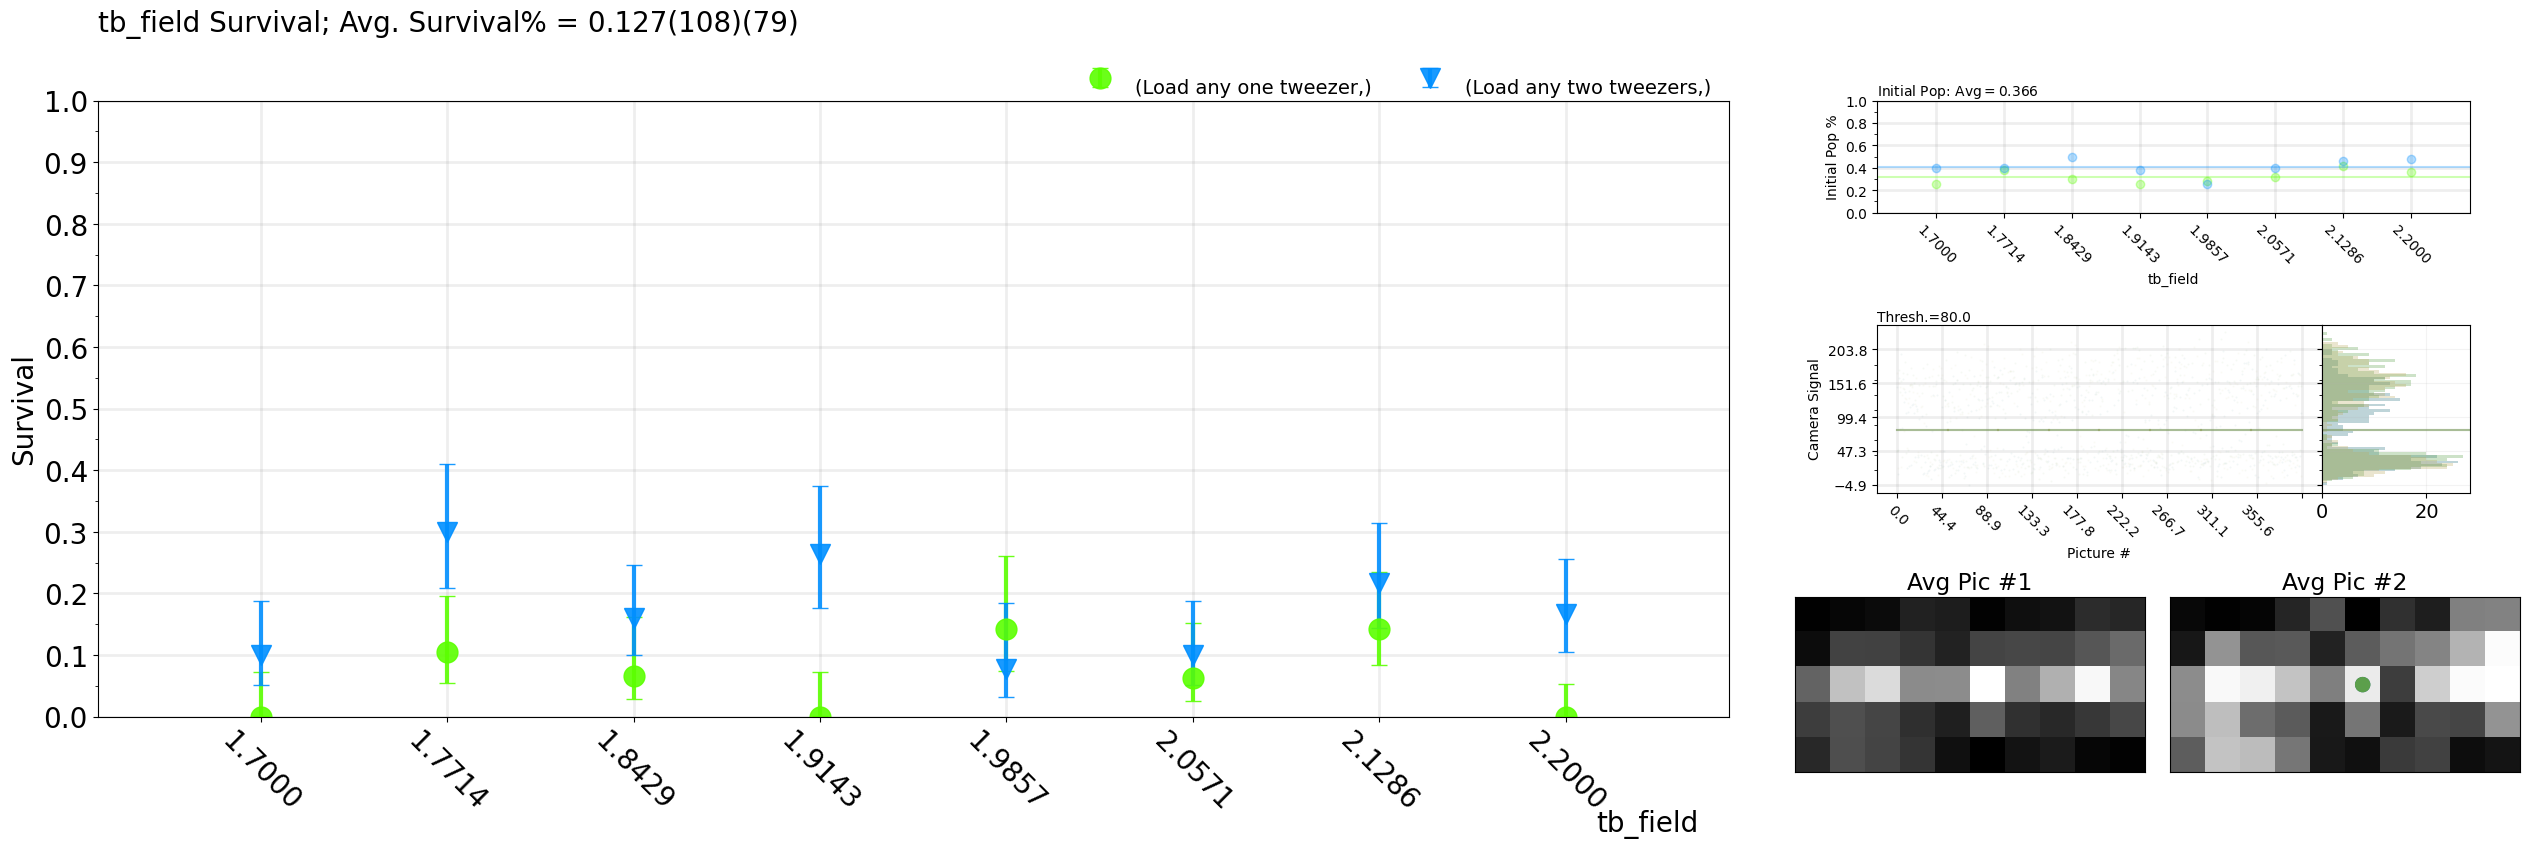

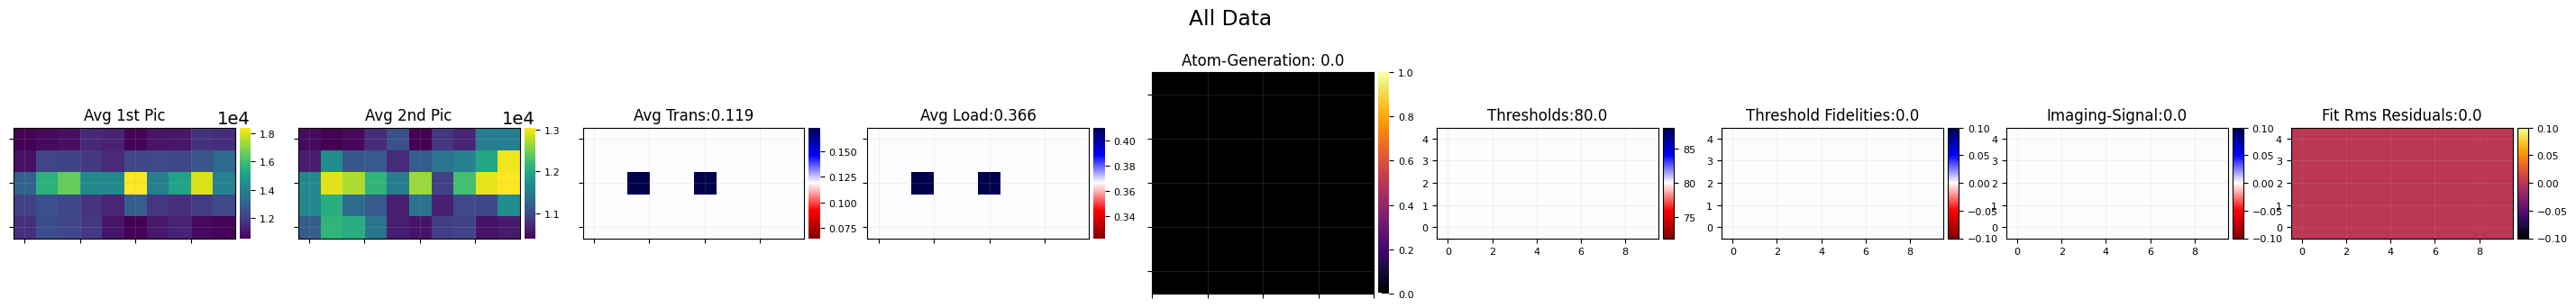

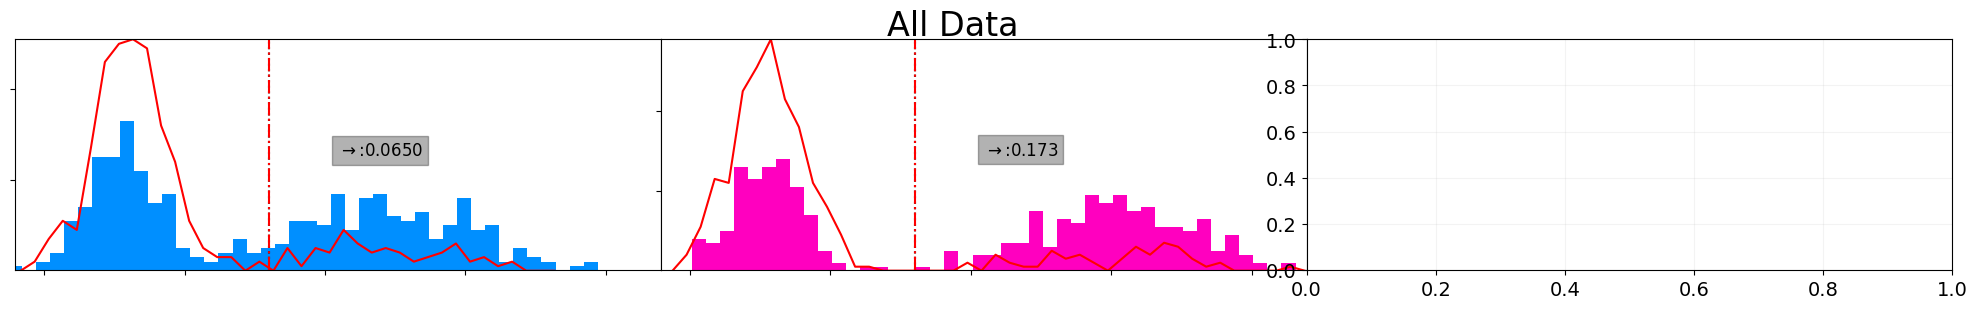

In [20]:
reloadMyModules(26,'October')
mp.Transfer(6, loadOpt, plotIndvHists = True, plotAvg=False, 
            tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 80)]);

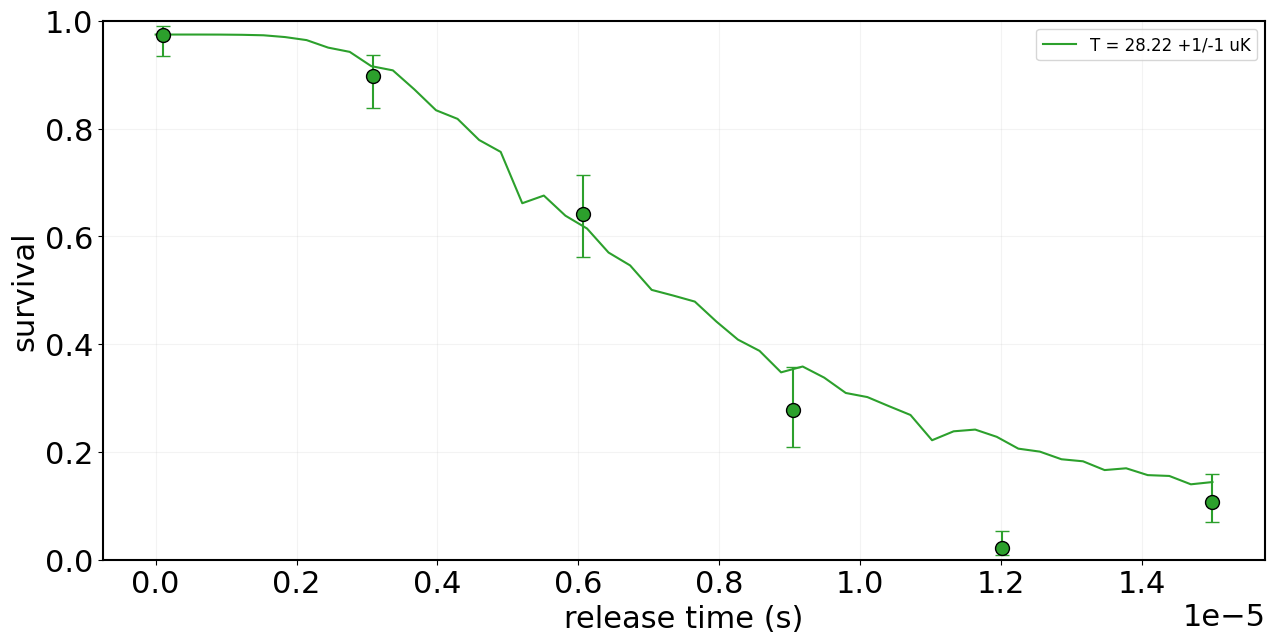

In [751]:
reloadMyModules(29,'December')
fileId = 22
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess = 15e-6
trap_depth = .5e-3

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=4)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

In [25]:
U0=.5e-3
U0_unc=0.04693e-3

T0_NRQA = 29.82e-6
T0_NRQA_unc =2e-6

T0_NRZF = 20e-6
T0_NRZF_unc =2e-6

T0_RZF = 15e-6
T0_RZF_unc =2e-6

## Beta vs Intensity -  Non-retro beam (quant. axis), U=10 MHz, $\Delta = 87.5$ D1 F=2-2' 

### 0.1 S

/Users/stevenpampel/Documents/B232_Data_Analysis/Data Analysis Notebook/../Analysis_Python_Files/CollisionalAnalysis.py:39: RuntimeWarning:

overflow encountered in exp



beta = 1.0491401955408325e-12 +/- 3.7532827256267566e-13


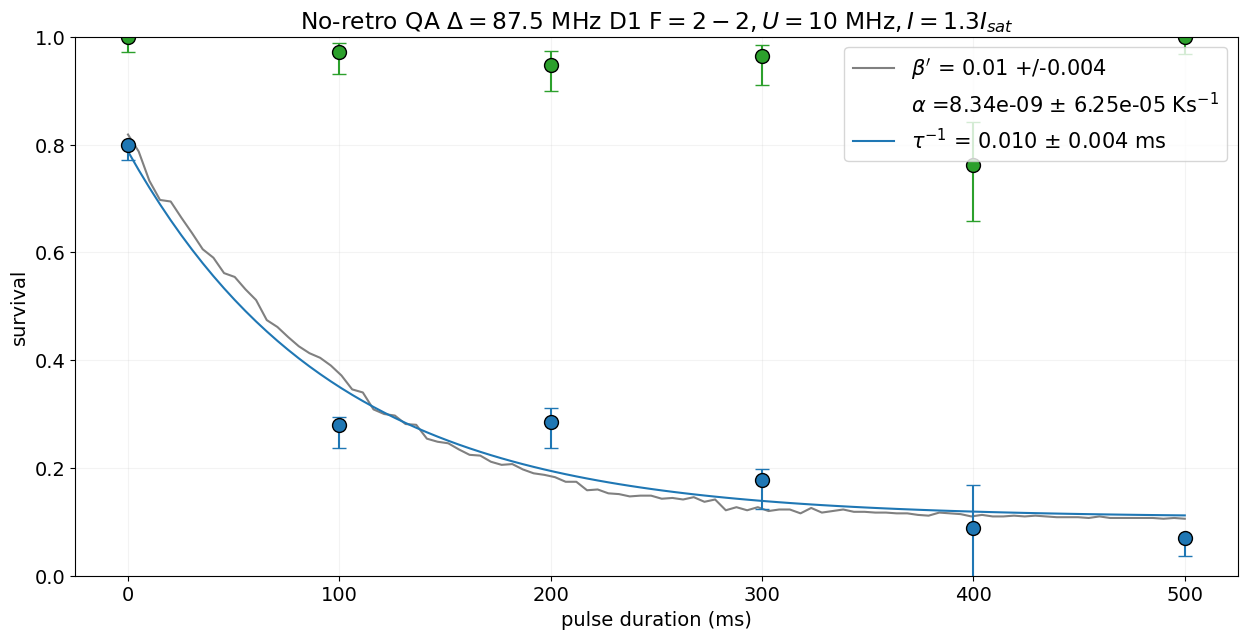

In [35]:
reloadMyModules(24,'October')
fileId = 12
threshold = 80
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRQA,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.1), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRQA,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'No-retro QA $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_p1SD187_QA,beta_p1SD187_QA_unc = lac.betaCalc(beta_prime,U0,T0_NRQA,decay_unc,U0_unc,T0_NRQA_unc)
print('beta =',beta_p1SD187_QA,'+/-',beta_p1SD187_QA_unc)

### 0.5 S

beta = 1.1808463310309702e-11 +/- 1.163111495954551e-12


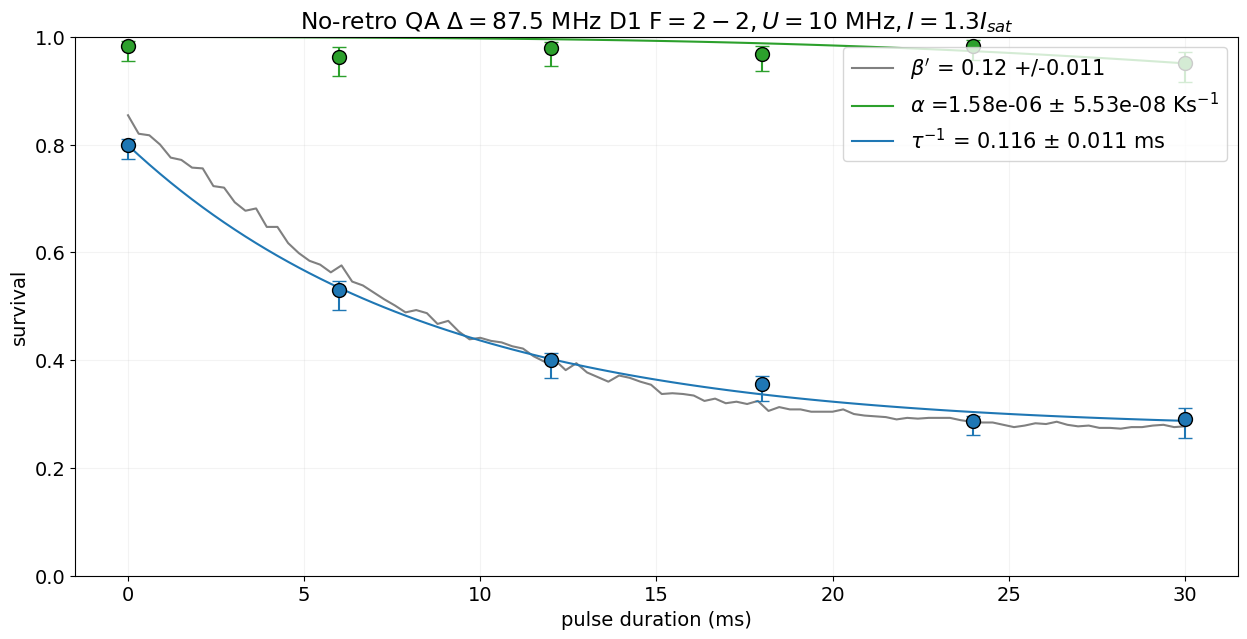

In [37]:

reloadMyModules(24,'October')
fileId = 35
threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRQA,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.25), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRQA,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'No-retro QA $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_p5SD187_QA,beta_p5SD187_QA_unc = lac.betaCalc(beta_prime,U0,T0_NRQA,decay_unc,U0_unc,T0_NRQA_unc)
print('beta =',beta_p5SD187_QA,'+/-',beta_p5SD187_QA_unc)

### 1 S

beta = 1.6508099523681135e-11 +/- 1.4893702729459665e-12


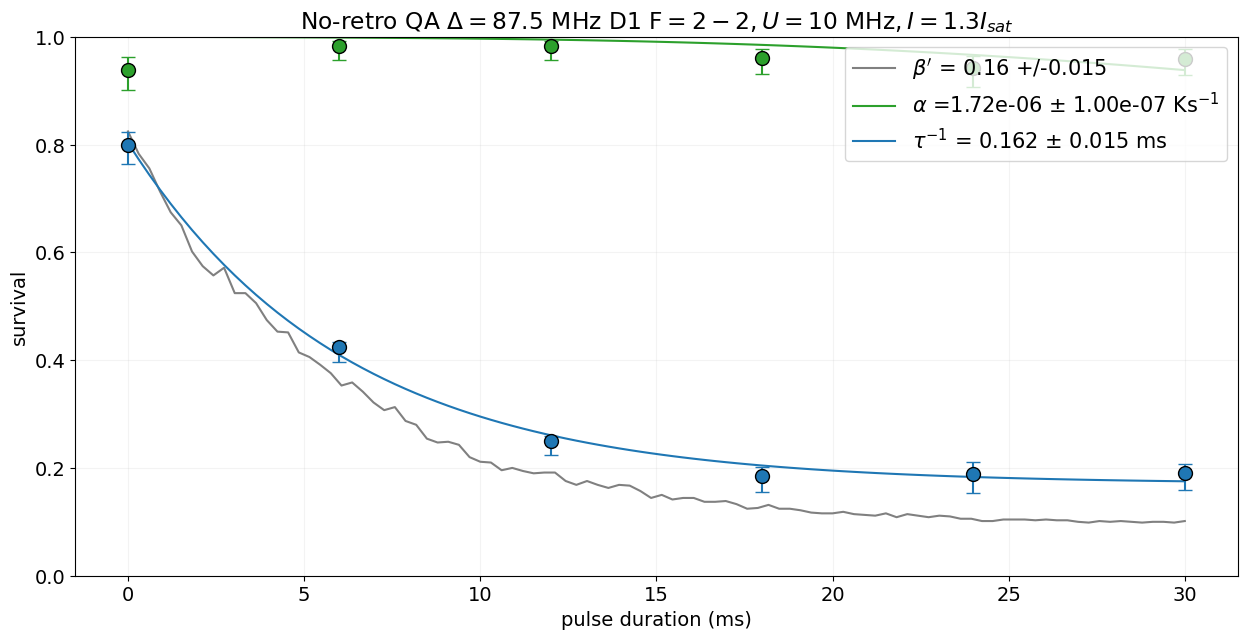

In [38]:

reloadMyModules(24,'October')
fileId = 30
threshold = 80
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRQA,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.1), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRQA,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'No-retro QA $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_1SD187_QA,beta_1SD187_QA_unc = lac.betaCalc(beta_prime,U0,T0_NRQA,decay_unc,U0_unc,T0_NRQA_unc)
print('beta =',beta_1SD187_QA,'+/-',beta_1SD187_QA_unc)

### 2 S

beta = 1.711804299317053e-11 +/- 3.9861707796380076e-12


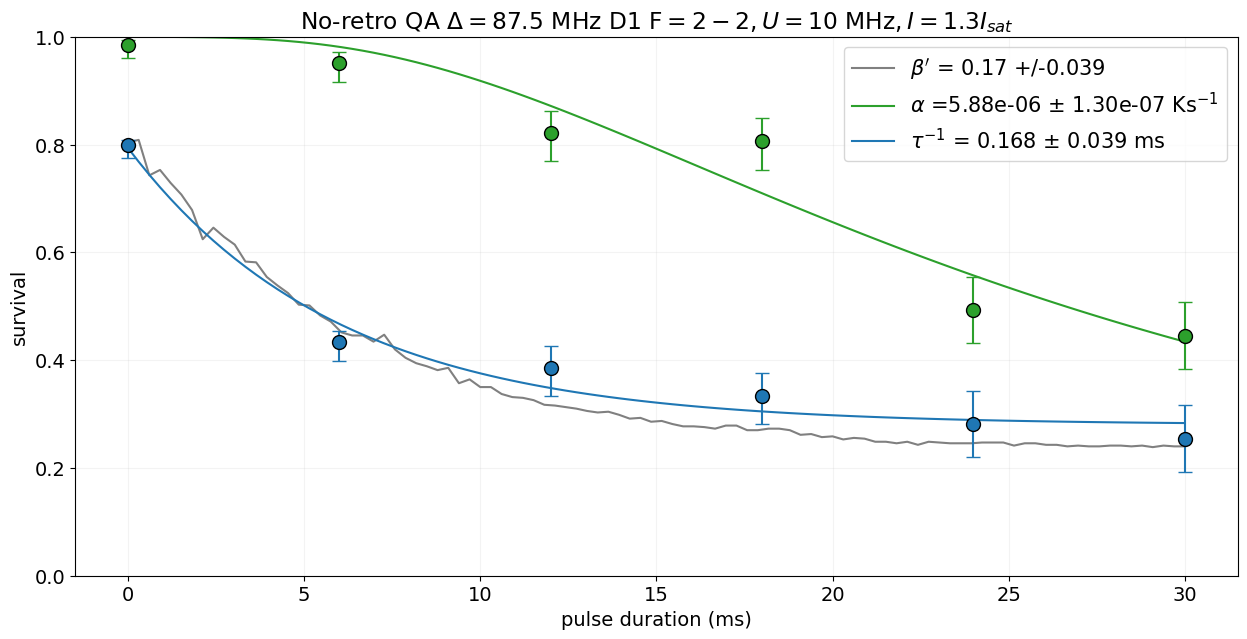

In [40]:

reloadMyModules(24,'October')
fileId = 31
threshold = 75
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRQA,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.25), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRQA,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'No-retro QA $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_2SD187_QA,beta_2SD187_QA_unc = lac.betaCalc(beta_prime,U0,T0_NRQA,decay_unc,U0_unc,T0_NRQA_unc)
print('beta =',beta_2SD187_QA,'+/-',beta_2SD187_QA_unc)

### 3 S

beta = 1.8632625551641352e-11 +/- 7.1425882981443394e-12


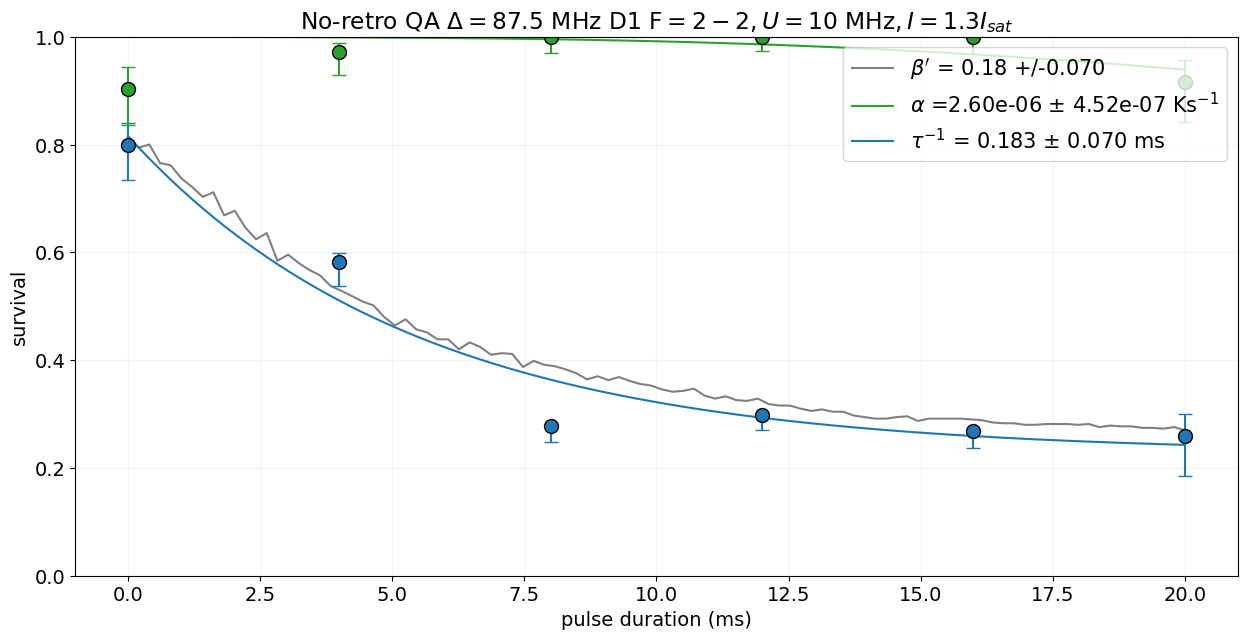

In [42]:

reloadMyModules(24,'October')
fileId = 27
threshold = 70
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRQA,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.25), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRQA,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'No-retro QA $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_3SD187_QA,beta_3SD187_QA_unc = lac.betaCalc(beta_prime,U0,T0_NRQA,decay_unc,U0_unc,T0_NRQA_unc)
print('beta =',beta_3SD187_QA,'+/-',beta_3SD187_QA_unc)

### Plot Beta vs I 

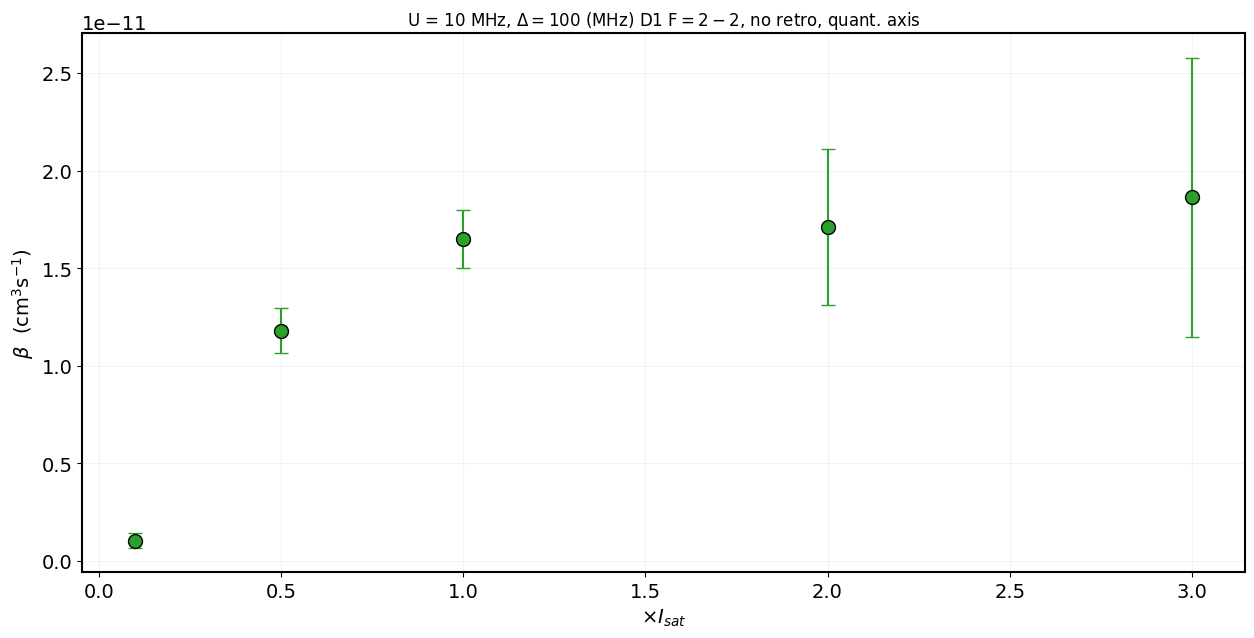

In [48]:
I = [0.1,0.5,1,2,3]
beta_D187_QA = [beta_p1SD187_QA,beta_p5SD187_QA,beta_1SD187_QA,beta_2SD187_QA,beta_3SD187_QA]
beta_D187_QA_unc = [beta_p1SD187_QA_unc,beta_p5SD187_QA_unc,beta_1SD187_QA_unc,beta_2SD187_QA_unc,beta_3SD187_QA_unc]
beta_D187_QA_error = [beta_D187_QA_unc,beta_D187_QA_unc]

fig,ax = plt.subplots(1, figsize=[15,7])
ax.errorbar(I,beta_D187_QA, yerr=beta_D187_QA_error,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.set_ylim(1e-20,1.5e-12)
# ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\times I_{sat}$')
plt.title(r'U = 10 MHz, $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$, no retro, quant. axis',fontsize=12) 
plt.rcParams["axes.linewidth"] = 1.5

## Beta vs Intensity -  Non-retro beam (zero fields), U=10 MHz, $\Delta = 87.5$ D1 F=2-2' 

### 0.1 S

beta = 5.674924718607664e-12 +/- 2.0138084115039915e-12


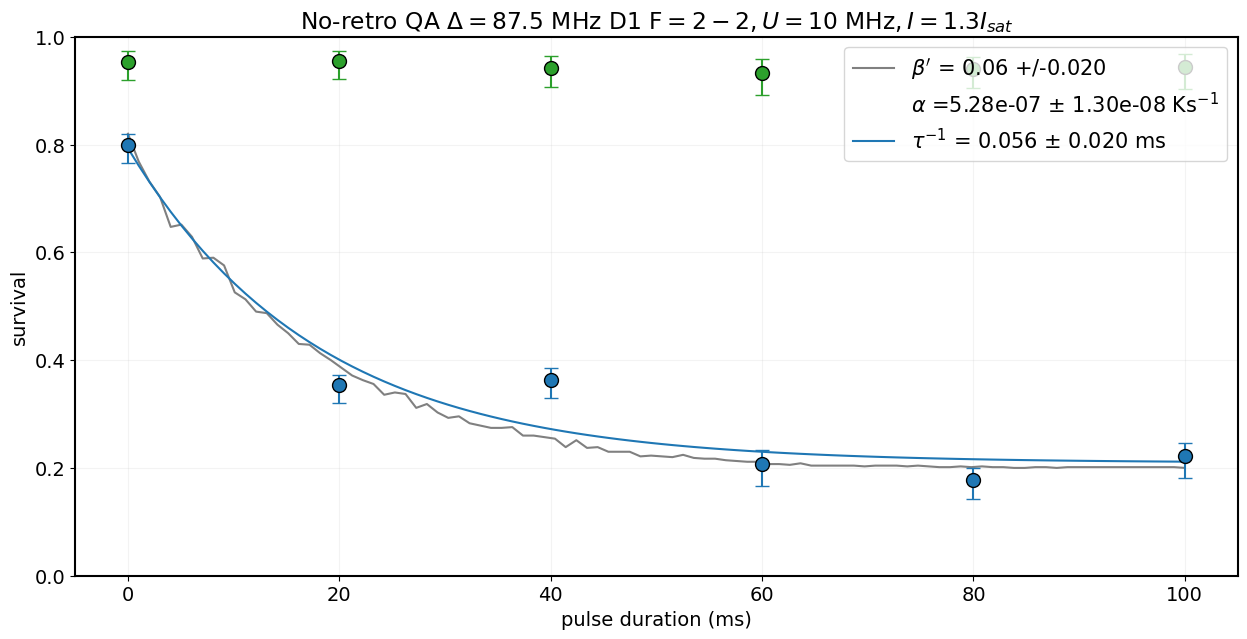

In [50]:

reloadMyModules(24,'October')
fileId = 37
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRZF,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.2), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRZF,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'No-retro ZF $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_p1SD187_ZF,beta_p1SD187_ZF_unc = lac.betaCalc(beta_prime,U0,T0_NRZF,decay_unc,U0_unc,T0_NRZF_unc)
print('beta =',beta_p1SD187_ZF,'+/-',beta_p1SD187_ZF_unc)

### 0.5 S

beta = 1.9378522852476776e-11 +/- 5.468509962037168e-12


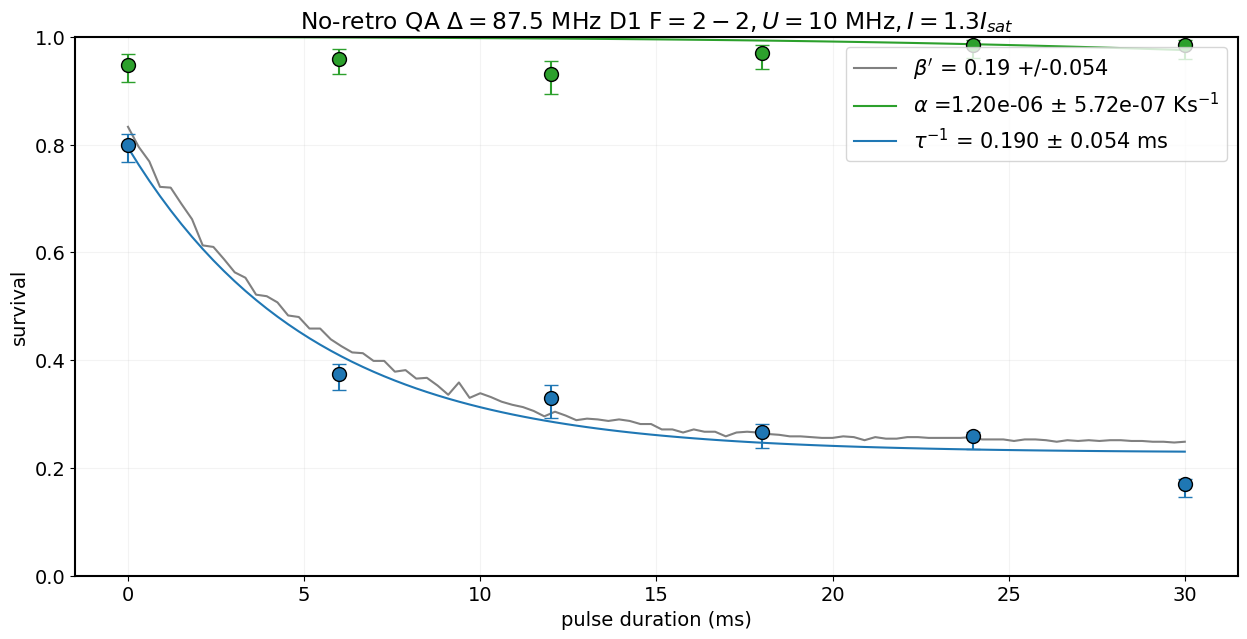

In [54]:

reloadMyModules(24,'October')
fileId = 34
threshold = 70
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRZF,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.25), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRZF,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'No-retro ZF $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_p5SD187_ZF,beta_p5SD187_ZF_unc = lac.betaCalc(beta_prime,U0,T0_NRZF,decay_unc,U0_unc,T0_NRZF_unc)
print('beta =',beta_p5SD187_ZF,'+/-',beta_p5SD187_ZF_unc)

### 1 S

beta = 2.7904961294976147e-11 +/- 7.048404543632304e-12


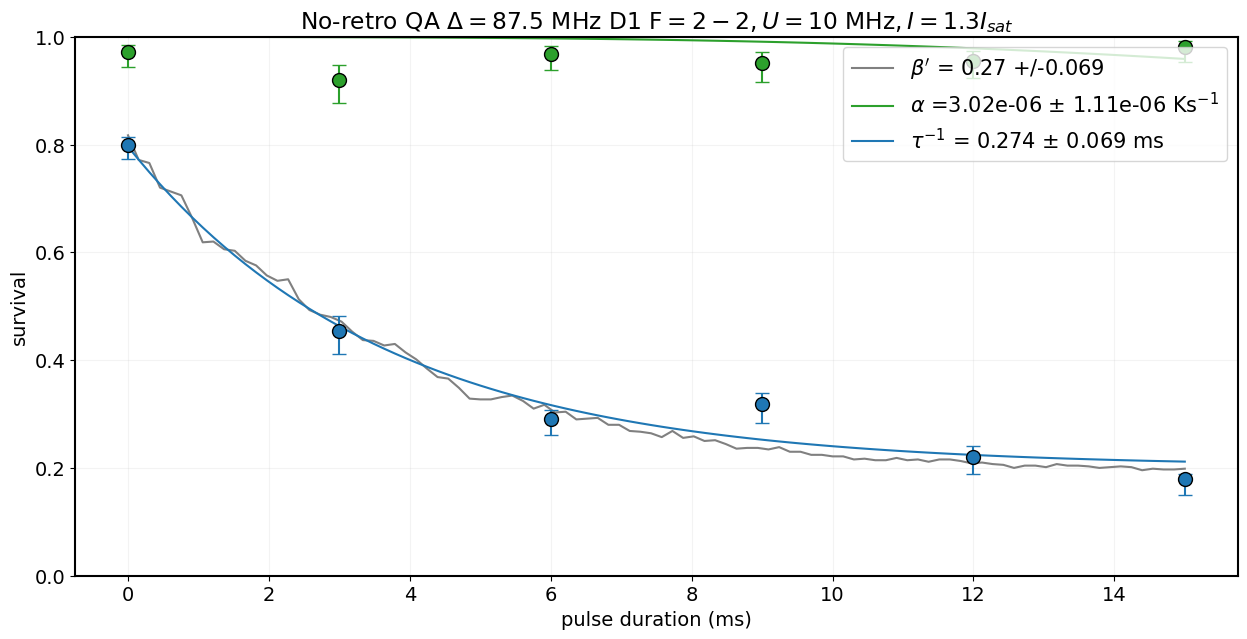

In [53]:

reloadMyModules(24,'October')
fileId = 45
threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRZF,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.2), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRZF,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'No-retro ZF $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_1SD187_ZF,beta_1SD187_ZF_unc = lac.betaCalc(beta_prime,U0,T0_NRZF,decay_unc,U0_unc,T0_NRZF_unc)
print('beta =',beta_1SD187_ZF,'+/-',beta_1SD187_ZF_unc)

### 2 S

beta = 3.9169199450902086e-11 +/- 1.2802450570738733e-11


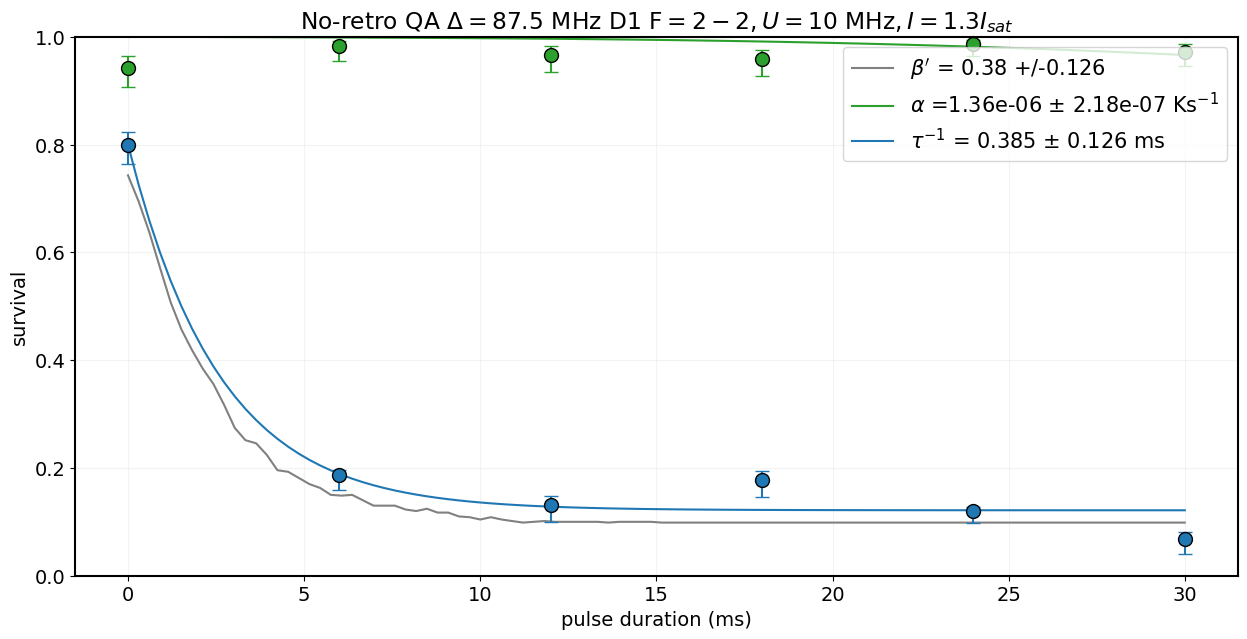

In [52]:

reloadMyModules(24,'October')
fileId = 38
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRZF,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.1), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRZF,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'No-retro ZF $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_2SD187_ZF,beta_2SD187_ZF_unc = lac.betaCalc(beta_prime,U0,T0_NRZF,decay_unc,U0_unc,T0_NRZF_unc)
print('beta =',beta_2SD187_ZF,'+/-',beta_2SD187_ZF_unc)

### 3 S

beta = 2.7904961294976147e-11 +/- 7.048404543632304e-12


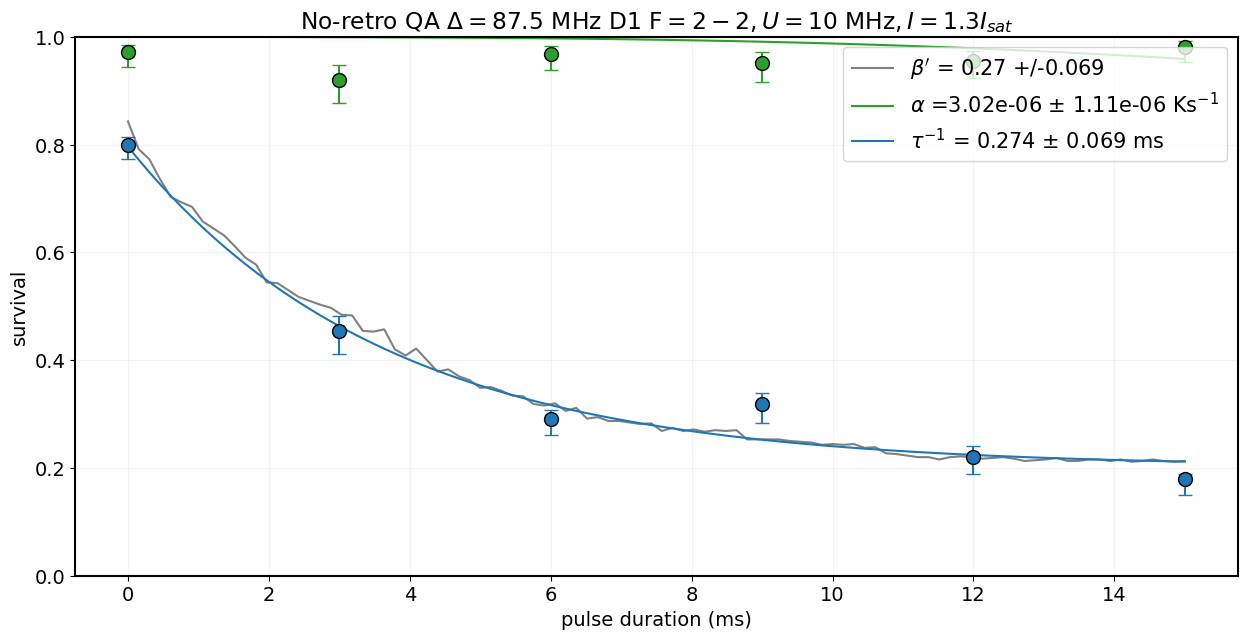

In [56]:

reloadMyModules(24,'October')
fileId = 45
threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRQA,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.2), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_NRZF,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'No-retro ZF $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_3SD187_ZF,beta_3SD187_ZF_unc = lac.betaCalc(beta_prime,U0,T0_NRZF,decay_unc,U0_unc,T0_NRZF_unc)
print('beta =',beta_3SD187_ZF,'+/-',beta_3SD187_ZF_unc)

### Plot Beta vs I 

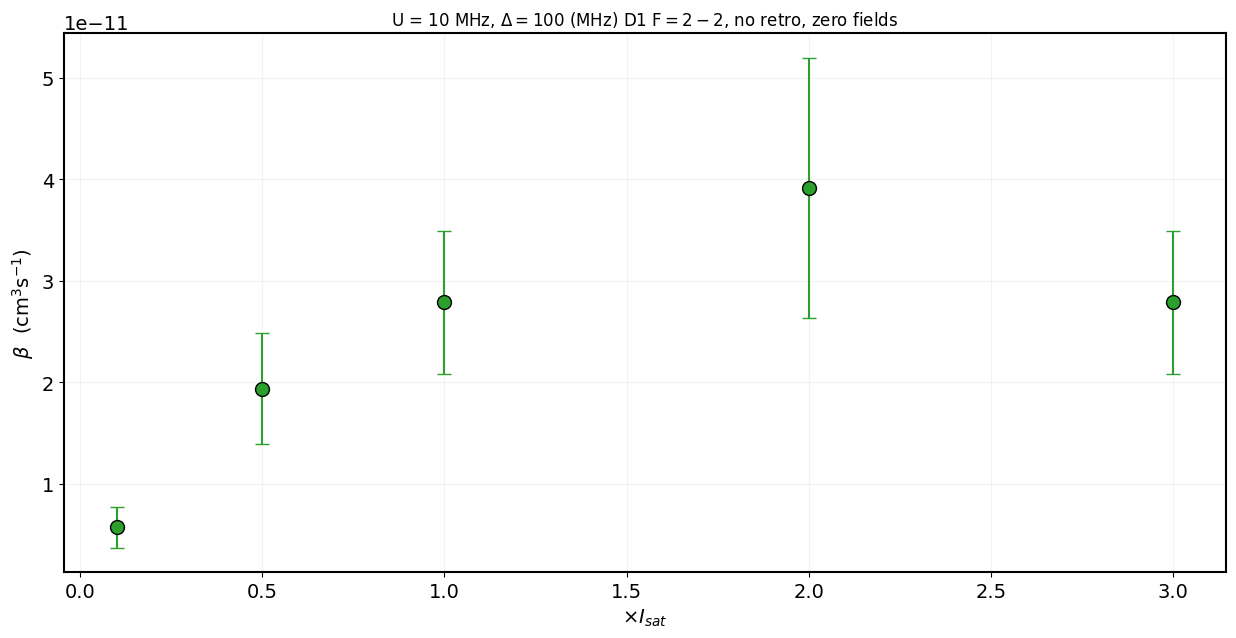

In [65]:
I = [0.1,0.5,1,2,3]
beta_D187_ZF = [beta_p1SD187_ZF,beta_p5SD187_ZF,beta_1SD187_ZF,beta_2SD187_ZF,beta_3SD187_ZF]
beta_D187_ZF_unc = [beta_p1SD187_ZF_unc,beta_p5SD187_ZF_unc,beta_1SD187_ZF_unc,beta_2SD187_ZF_unc,beta_3SD187_ZF_unc]
beta_D187_ZF_error = [beta_D187_ZF_unc,beta_D187_ZF_unc]

fig,ax = plt.subplots(1, figsize=[15,7])
ax.errorbar(I,beta_D187_ZF, yerr=beta_D187_ZF_error,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.set_ylim(1e-20,1.5e-12)
# ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\times I_{sat}$')
plt.title(r'U = 10 MHz, $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$, no retro, zero fields',fontsize=12) 
plt.rcParams["axes.linewidth"] = 1.5


## Beta vs Intensity -  Retro beam, U=10 MHz, $\Delta = 87.5$ D1 F=2-2' 

### 0.1 S

beta = 1.7501077012189851e-12 +/- 4.586770460633131e-13


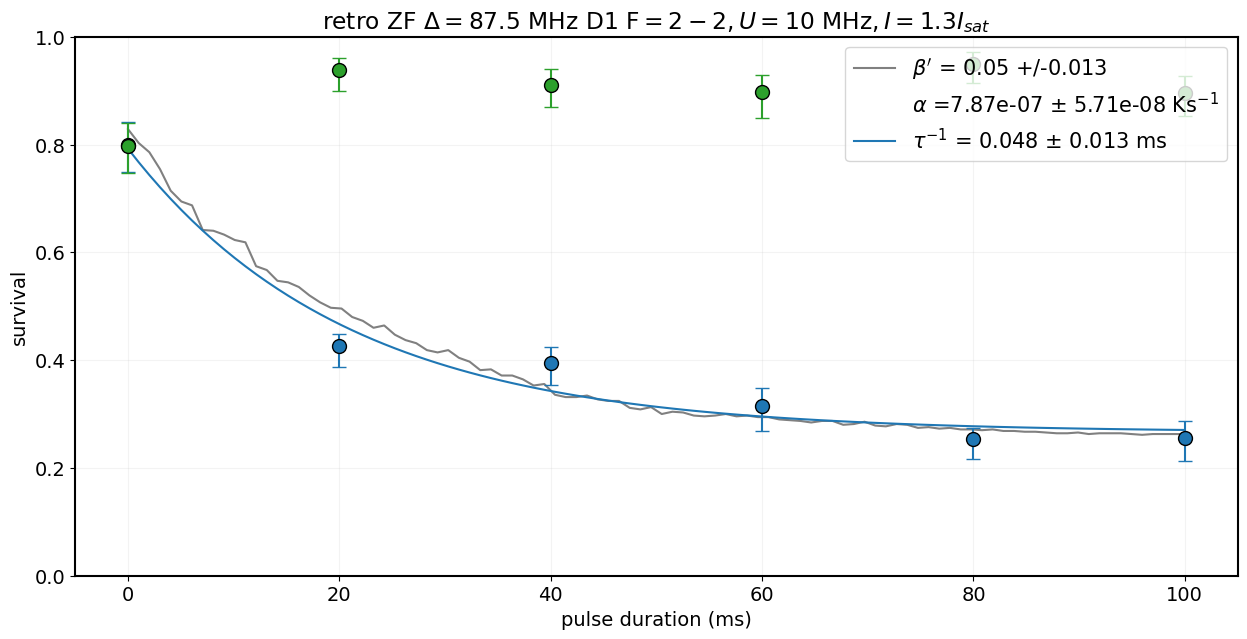

In [58]:

reloadMyModules(25,'October')
fileId = 24
threshold = 80
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_RZF,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.25), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_RZF,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'retro ZF $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_p1SD187_ZFRetro,beta_p1SD187_ZFRetro_unc = lac.betaCalc(beta_prime,U0,T0_RZF,decay_unc,U0_unc,T0_RZF_unc)
print('beta =',beta_p1SD187_ZFRetro,'+/-',beta_p1SD187_ZFRetro_unc)

### 0.5 S

beta = 2.276265075243865e-11 +/- 5.158067472007171e-12


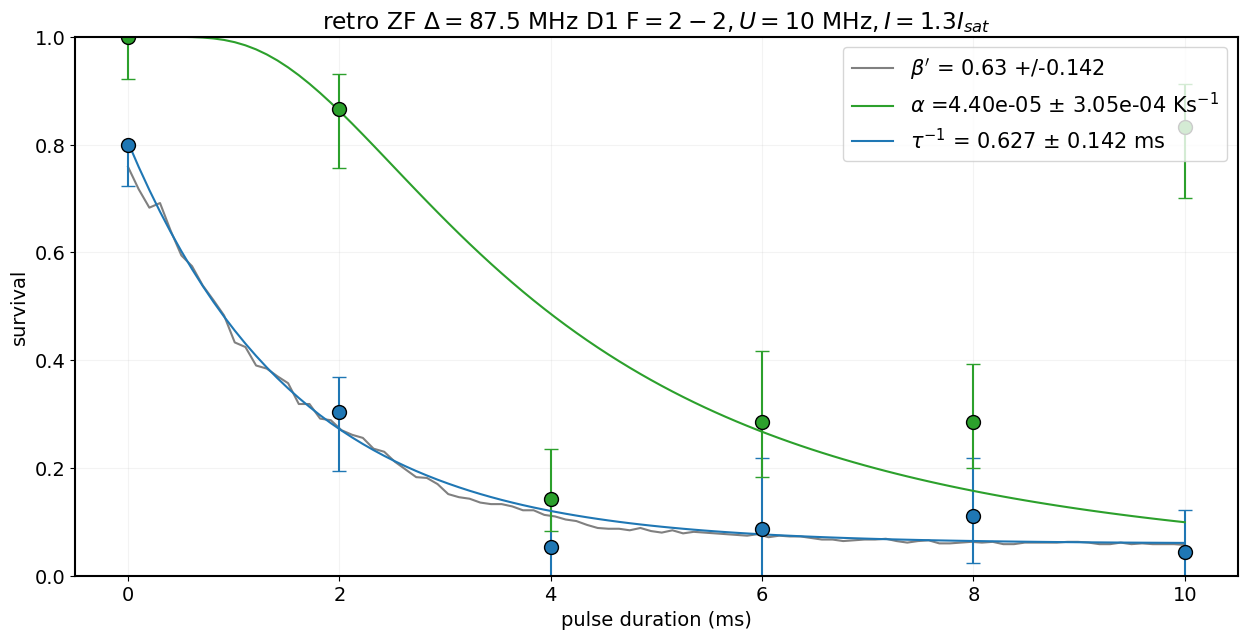

In [59]:

reloadMyModules(25,'October')
fileId = 26
threshold = 90
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_RZF,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.05), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_RZF,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'retro ZF $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_p5SD187_ZFRetro,beta_p5SD187_ZFRetro_unc = lac.betaCalc(beta_prime,U0,T0_RZF,decay_unc,U0_unc,T0_RZF_unc)
print('beta =',beta_p5SD187_ZFRetro,'+/-',beta_p5SD187_ZFRetro_unc)

### 1 S

beta = 4.8328105602116705e-11 +/- 8.6989906684815e-12


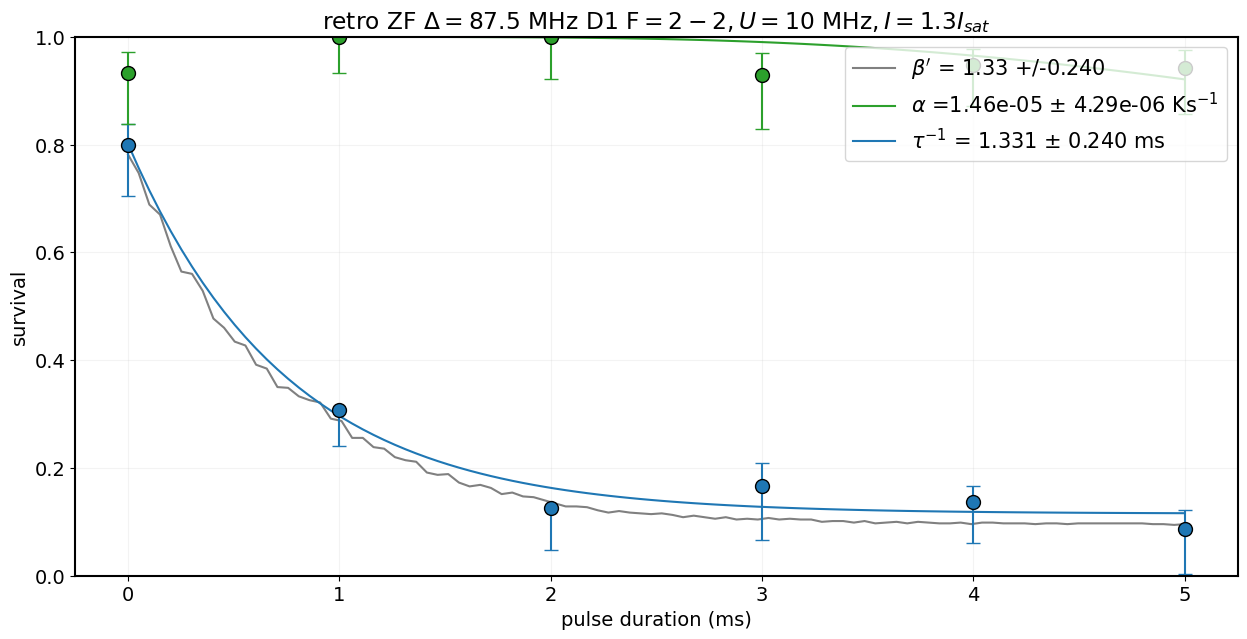

In [60]:

reloadMyModules(25,'October')
fileId = 27
threshold = 70
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_RZF,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.1), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_RZF,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'retro ZF $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_1SD187_ZFRetro,beta_1SD187_ZFRetro_unc = lac.betaCalc(beta_prime,U0,T0_RZF,decay_unc,U0_unc,T0_RZF_unc)
print('beta =',beta_1SD187_ZFRetro,'+/-',beta_1SD187_ZFRetro_unc)

### 2 S

beta = 3.6953508400827415e-11 +/- 1.8763689835799823e-11


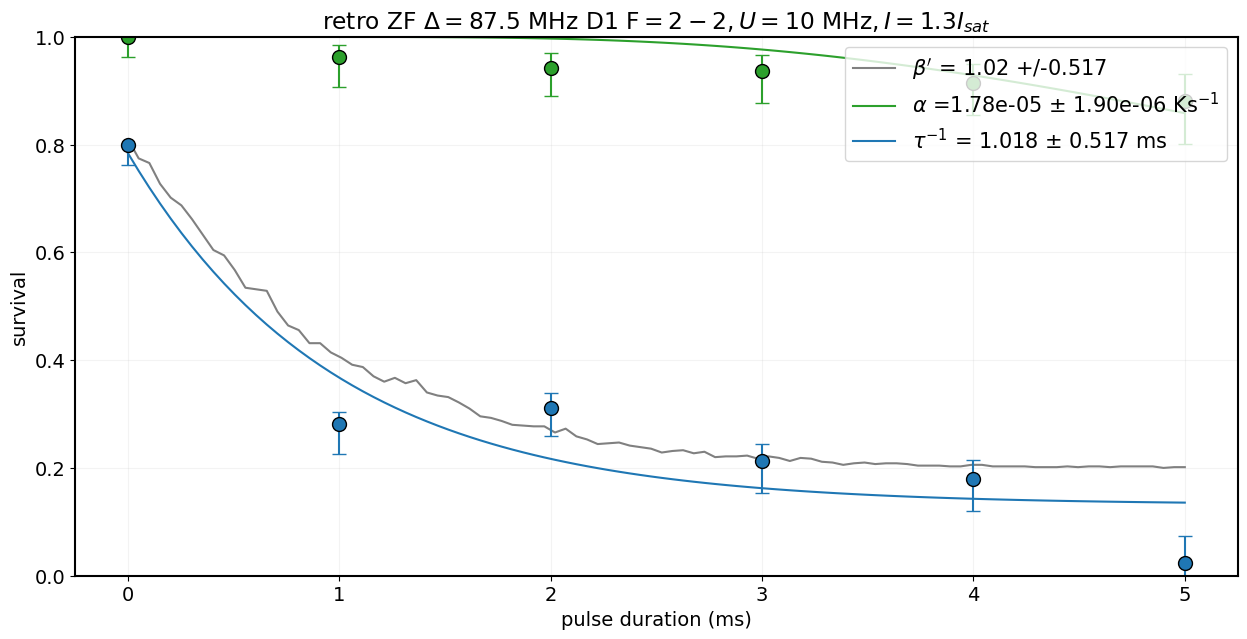

In [61]:

reloadMyModules(25,'October')
fileId = 28
threshold = 70
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_RZF,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.2), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_RZF,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'retro ZF $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_2SD187_ZFRetro,beta_2SD187_ZFRetro_unc = lac.betaCalc(beta_prime,U0,T0_RZF,decay_unc,U0_unc,T0_RZF_unc)
print('beta =',beta_2SD187_ZFRetro,'+/-',beta_2SD187_ZFRetro_unc)

### 3 S

beta = 4.116174920805873e-11 +/- 6.975480267694388e-12


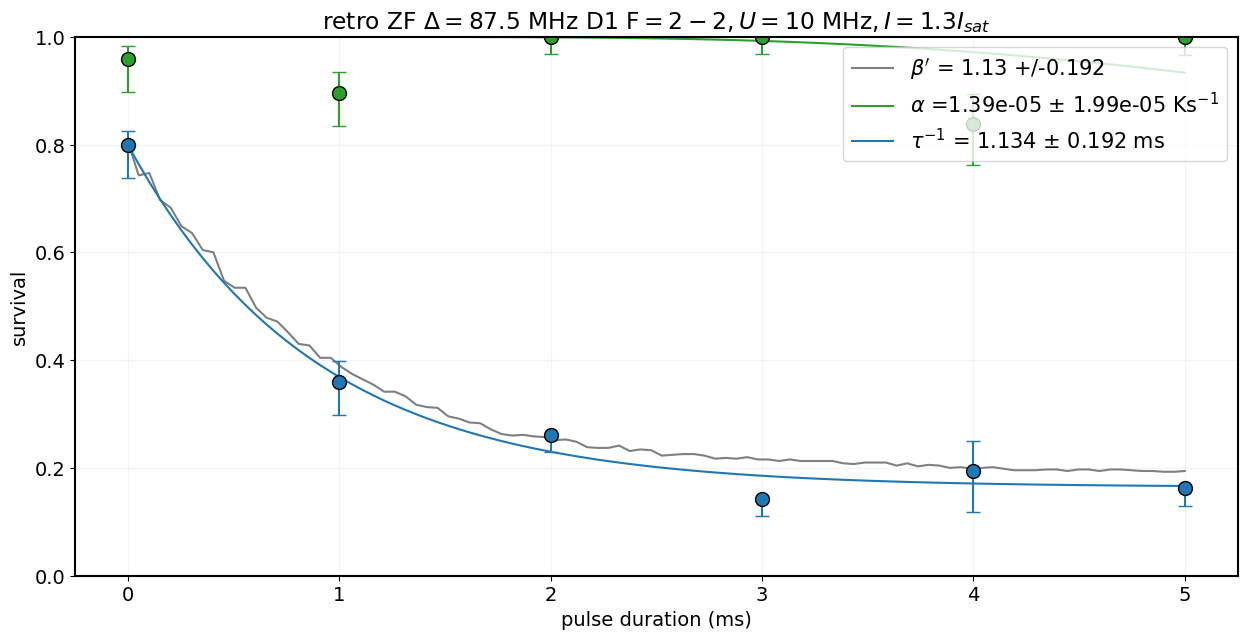

In [62]:

reloadMyModules(25,'October')
fileId = 29
threshold = 70
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_RZF,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,plot=False)
fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start = .8, asymp=0.2), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0_RZF,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'retro ZF $  \Delta = 87.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
beta_3SD187_ZFRetro,beta_3SD187_ZFRetro_unc = lac.betaCalc(beta_prime,U0,T0_RZF,decay_unc,U0_unc,T0_RZF_unc)
print('beta =',beta_3SD187_ZFRetro,'+/-',beta_3SD187_ZFRetro_unc)

### Plot Beta vs I 

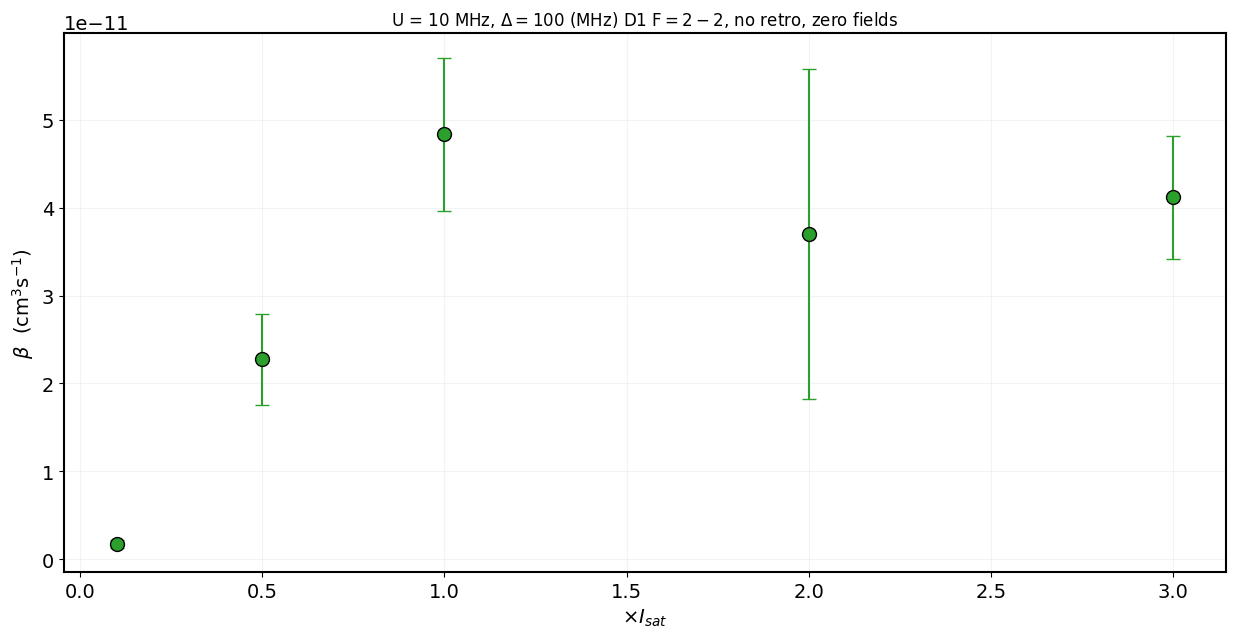

In [64]:
I = [0.1,0.5,1,2,3]
beta_D187_ZFRetro = [beta_p1SD187_ZFRetro,beta_p5SD187_ZFRetro,beta_1SD187_ZFRetro,beta_2SD187_ZFRetro,beta_3SD187_ZFRetro]
beta_D187_ZFRetro_unc = [beta_p1SD187_ZFRetro_unc,beta_p5SD187_ZFRetro_unc,beta_1SD187_ZFRetro_unc,beta_2SD187_ZFRetro_unc,beta_3SD187_ZFRetro_unc]
beta_D187_ZFRetro_error = [beta_D187_ZFRetro_unc,beta_D187_ZFRetro_unc]

fig,ax = plt.subplots(1, figsize=[15,7])
ax.errorbar(I,beta_D187_ZFRetro, yerr=beta_D187_ZFRetro_error,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.set_ylim(1e-20,1.5e-12)
# ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\times I_{sat}$')
plt.title(r'U = 10 MHz, $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$, no retro, zero fields',fontsize=12) 
plt.rcParams["axes.linewidth"] = 1.5


## Beta vs Intensity -  Retro beam, U=10 MHz, $\Delta = 250$ D1 F=2-2' 

### 0.1 S

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 12:34:18: on (Y-M-D) 2023-10-25, And ended at 12:44:5: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.04819699602236669 gamma uncertainty = 0.012631624270920936


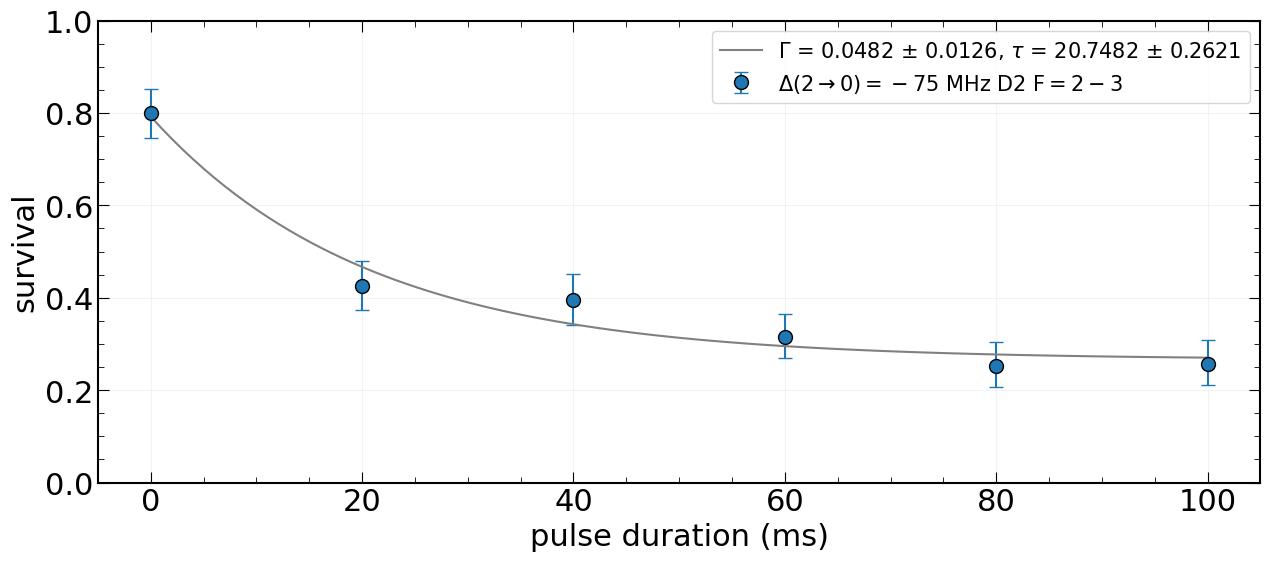

In [50]:

reloadMyModules(25,'October')
fileId = 24
threshold = 80
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_p1SD1250_ZFRetro = decay_constant
gamma_p1SD1250_ZFRetro_unc  = decay_constant_uncertainty
tau_p1SD1250_ZFRetro = one_over_e_time
tau_p1SD1250_ZFRetro_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 0.5 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 12:27:8: on (Y-M-D) 2023-10-25, And ended at 12:31:48: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.5652871651891007 gamma uncertainty = 0.13887403531550224


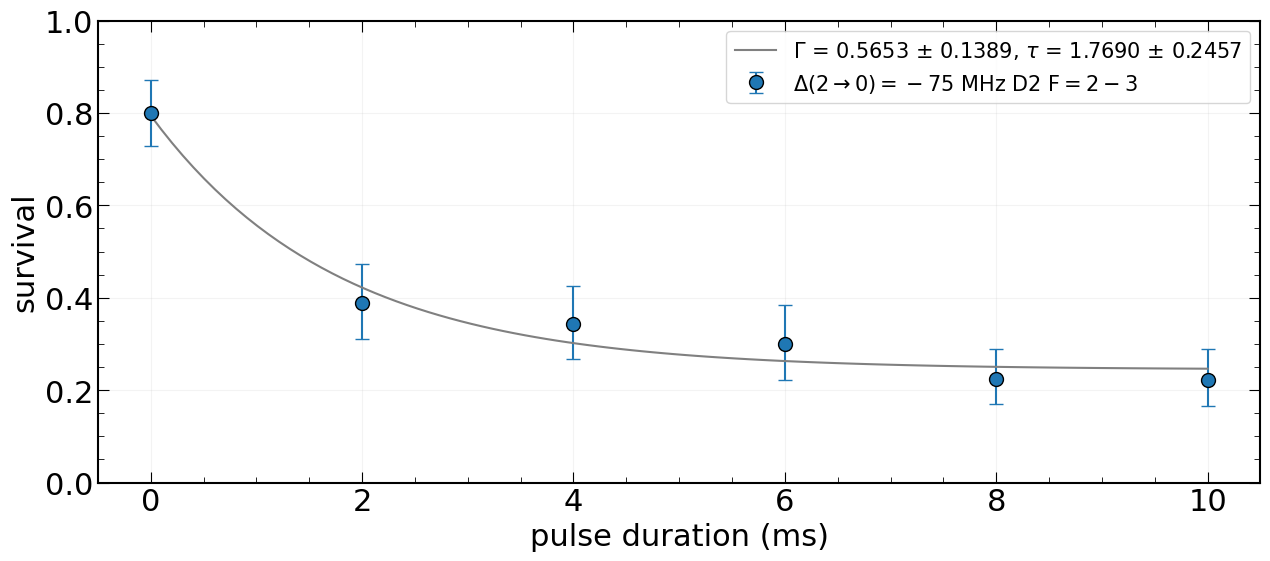

In [51]:

reloadMyModules(25,'October')
fileId = 23
threshold = 90
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
avgTferData1[3] = 0.3
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_p5SD1250_ZFRetro = decay_constant
gamma_p5SD1250_ZFRetro_unc = decay_constant_uncertainty
tau_p5SD1250_ZFRetro = one_over_e_time
tau_p5SD1250_ZFRetro_unc = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 1 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 12:4:31: on (Y-M-D) 2023-10-25, And ended at 12:9:9: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.970955901365209 gamma uncertainty = 0.22766506991030483


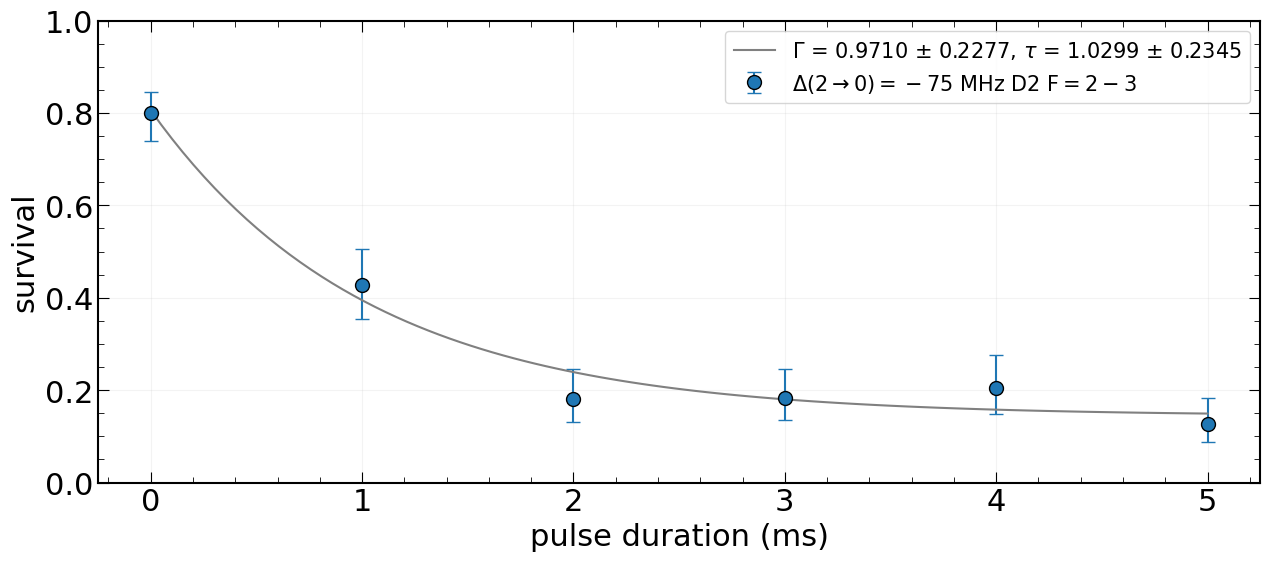

In [52]:

reloadMyModules(25,'October')
fileId = 20
threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_SD1250_ZFRetro = decay_constant
gamma_SD1250_ZFRetro_unc = decay_constant_uncertainty
tau_SD1250_ZFRetro = one_over_e_time
tau_SD1250_ZFRetro_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 2 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 12:9:55: on (Y-M-D) 2023-10-25, And ended at 12:14:33: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 1.3439641762340366 gamma uncertainty = 0.24305306079943148


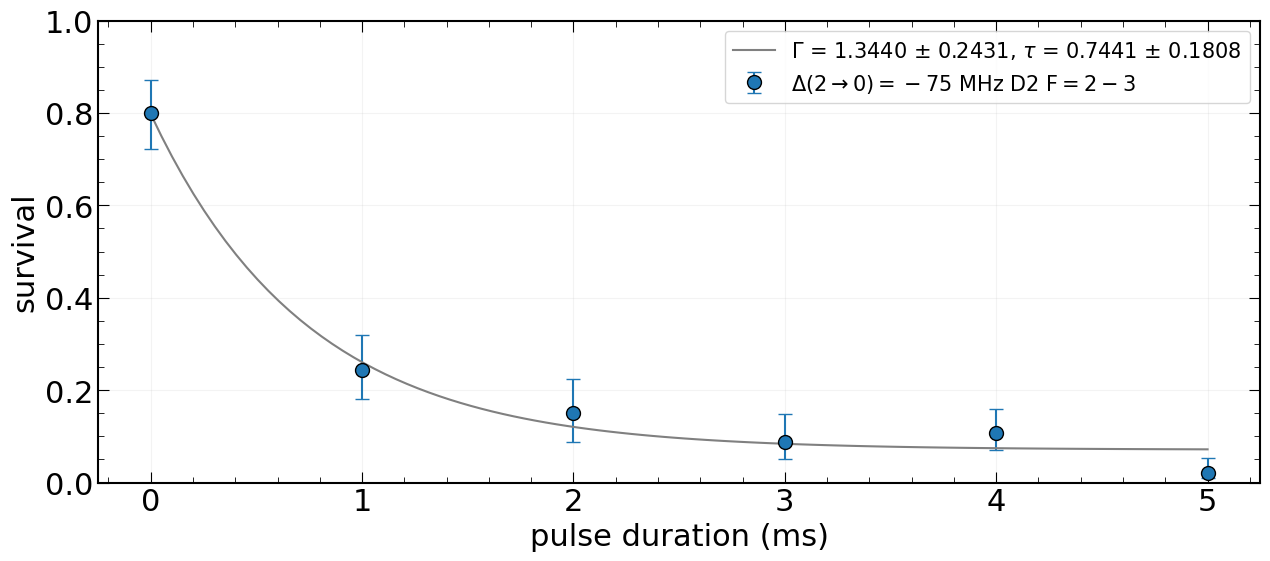

In [53]:

reloadMyModules(25,'October')
fileId = 21
threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
avgTferData1[2] = 0.15
# avgTferData1[5] = 0.1

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_2SD1250_ZFRetro = decay_constant
gamma_2SD1250_ZFRetro_unc = decay_constant_uncertainty
tau_2SD1250_ZFRetro = one_over_e_time
tau_2SD1250_ZFRetro_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 3 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 11:48:17: on (Y-M-D) 2023-10-25, And ended at 11:52:56: on 2023-10-25
Experiment Notes:  

gamma = 0.8696593511174666 gamma uncertainty = 0.11419832901130654


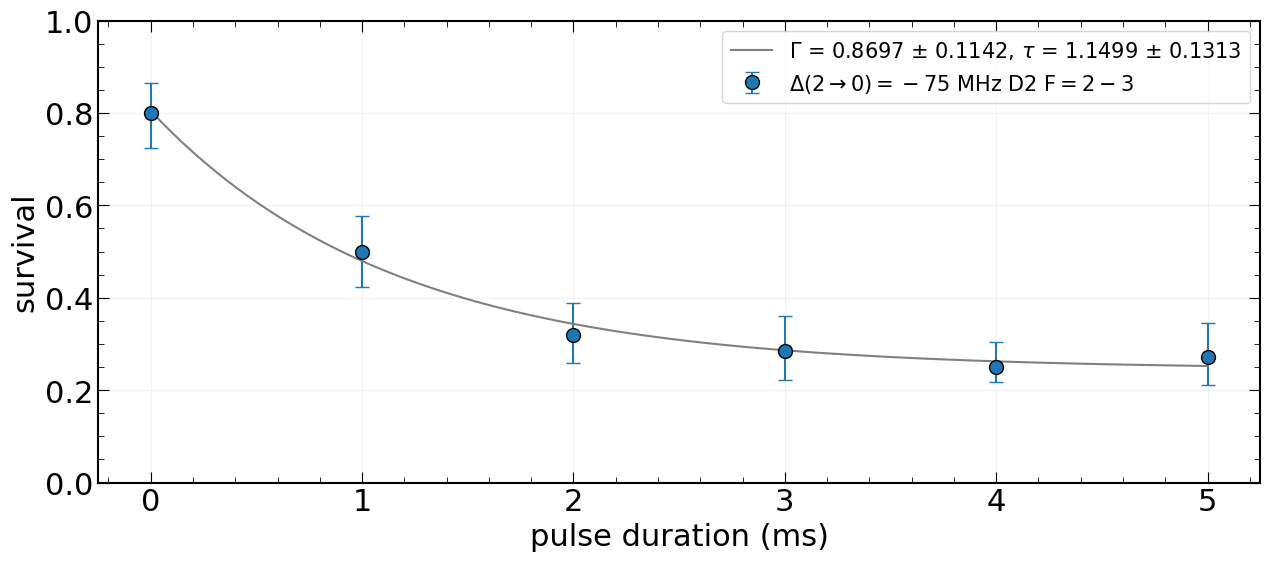

In [54]:

reloadMyModules(25,'October')
fileId = 18

threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
avgTferData1[4] = 0.25
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_3SD1250_ZFRetro = decay_constant
gamma_3SD1250_ZFRetro_unc = decay_constant_uncertainty
tau_3SD1250_ZFRetro = one_over_e_time
tau_3SD1250_ZFRetro_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### Plot Beta vs I 

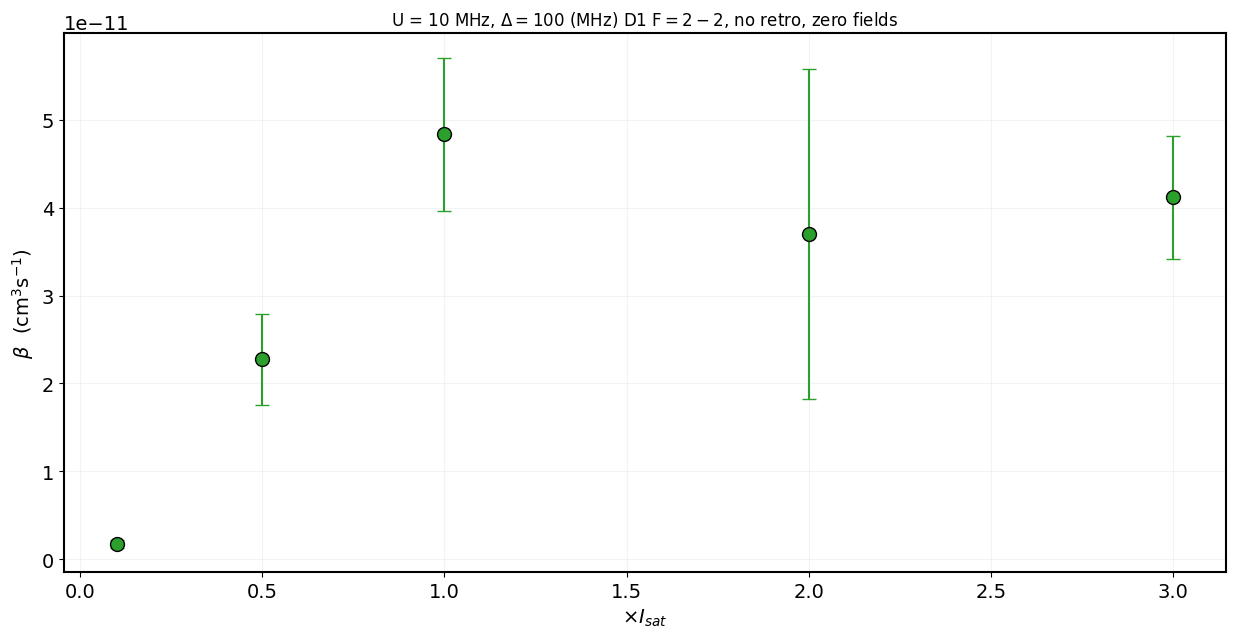

## D1 beta comparison

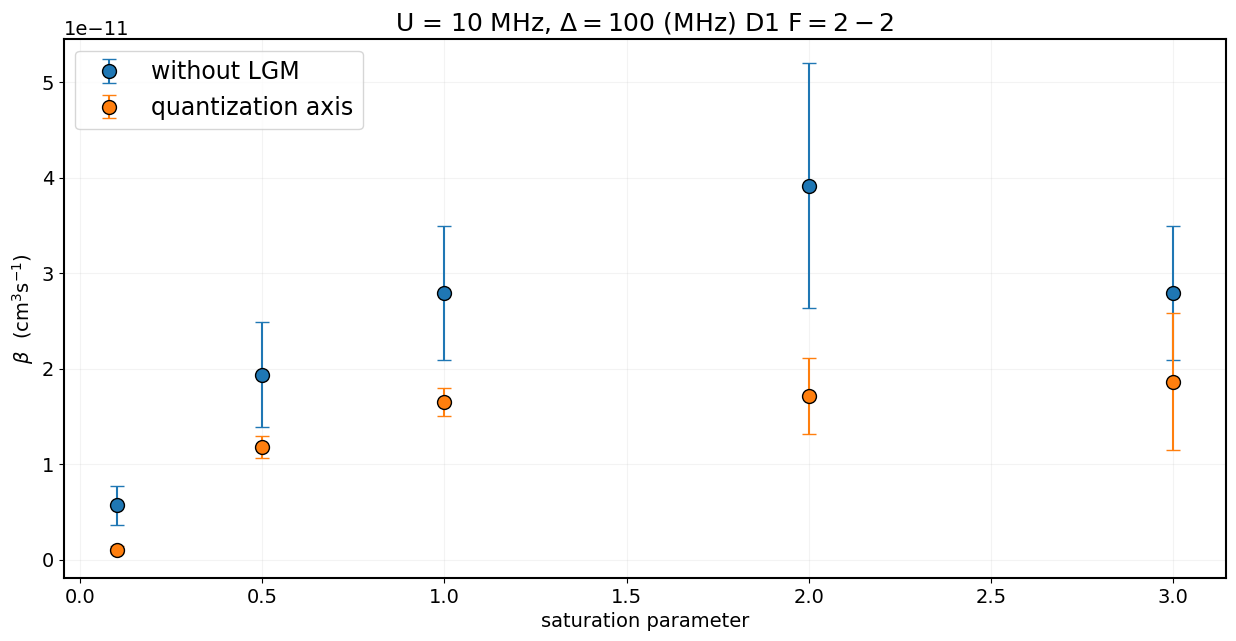

In [75]:

fig,ax = plt.subplots(1, figsize=[15,7])
color3 = 'tab:orange'
# ax.errorbar(I,beta_D187_ZFRetro, yerr=beta_D187_ZFRetro_error,ls='none',ecolor=color1,marker = 'o',markersize = 10,
#             markerfacecolor=color1,markeredgecolor='k',capsize=5,label='with LGM')

ax.errorbar(I,beta_D187_ZF, yerr=beta_D187_ZF_error,ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5,label='without LGM')

ax.errorbar(I,beta_D187_QA, yerr=beta_D187_QA_error,ls='none',ecolor=color3,marker = 'o',markersize = 10,
            markerfacecolor=color3,markeredgecolor='k',capsize=5,label='quantization axis')



# ax.set_ylim(1e-20,1.5e-12)
# ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'saturation parameter')
plt.title(r'U = 10 MHz, $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$',fontsize=18) 
plt.rcParams["axes.linewidth"] = 1.5
plt.legend(fontsize=17)
# plt.ticklabel_format(style='plain') 

In [57]:
import pandas as pd

# PGC
x = I
y = beta_ZFRetro
y_err_top = beta_error_ZFRetro[0]
y_err_bot = beta_error_ZFRetro[1]

# Create a DataFrame with the data
data = pd.DataFrame({'x': x, 'y': y, 'y_err_top': y_err_top,'y_err_bot': y_err_bot})

# Save the data to a CSV file
data.to_csv('beta_I_LGM.csv', index=False)


In [58]:
import pandas as pd

# no PGC
x = I
y = beta_ZF
y_err_top = beta_error_ZF[0]
y_err_bot = beta_error_ZF[1]

# Create a DataFrame with the data
data = pd.DataFrame({'x': x, 'y': y, 'y_err_top': y_err_top,'y_err_bot': y_err_bot})

# Save the data to a CSV file
data.to_csv('beta_I_NoLGM.csv', index=False)


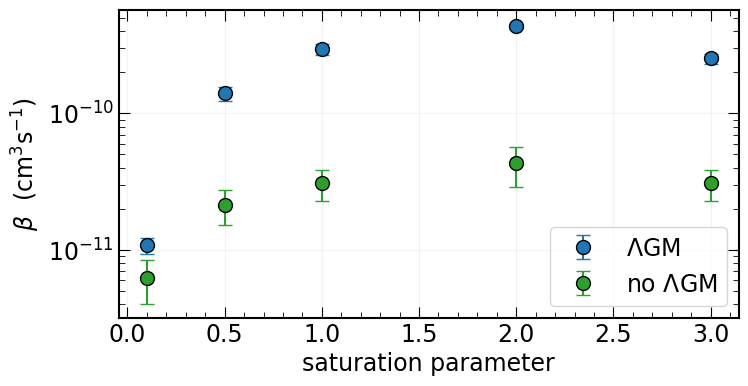

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file
beta_I_LGM = pd.read_csv('beta_I_LGM.csv')

# Extract the top and bottom error values
y_err_top = beta_I_LGM['y_err_top']
y_err_bottom = beta_I_LGM['y_err_bot']

# Create a scatter plot with asymmetric error bars
fig, ax = plt.subplots(figsize=(8, 4))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 17}
matplotlib.rc('font', **font)
color1 = 'tab:blue'
ax.errorbar(beta_I_LGM['x'], beta_I_LGM['y'], xerr=None, yerr=[y_err_bottom, y_err_top],ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5,label=r'$\Lambda \mathrm{GM}$')


# Load the data from the CSV file
beta_I_NoLGM = pd.read_csv('beta_I_NoLGM.csv')

# Extract the top and bottom error values
y_err_top = beta_I_NoLGM['y_err_top']
y_err_bottom = beta_I_NoLGM['y_err_bot']

color2 = 'tab:green'
ax.errorbar(beta_I_NoLGM['x'], beta_I_NoLGM['y'], xerr=None, yerr=[y_err_bottom, y_err_top],ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5,label=r'no $\Lambda \mathrm{GM}$')

ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'saturation parameter')
# plt.title(r'U = 10 MHz, $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$',fontsize=18) 
plt.rcParams["axes.linewidth"] = 1.5
plt.legend(fontsize=17)
plt.savefig("beta_vs_intensity.png", dpi=600, bbox_inches='tight')